# Exercises Lesson 5

Name: Carlos Cocha

In [1]:
import numpy as np
import pylab
from scipy import special
import matplotlib.pyplot as plt

### Exercise 5.1: The NIST Digital Library of Mathematical Functions (DLMF) is a very useful site, where you can find an updated and expanded version of the well-known reference Handbook of Mathematical Functions compiled by Abramowitz and Stegun. Define a function to compute the Bessel function of the first kind of integer index from the series 10.2.2 in the DLMF, add a docscript and plot the functions of order 0, 1, and 2 in the interval of x between 0 and 10.

In [2]:
def bessel_function(n , x):
    ''' 
    Function to  plot the Bessel function of the first kind  
    up tp order n in the interval of x.

    Input: 
    
    n :: maximum order of the function.
    x :: maximum interval value of the plot.
    '''  
    x = np.r_[0:x:100j] # x interval
    
    bessel_tuple = []
    for i in range(n + 1):
        # Calculating the n-order Bessel Function
        bessel_tuple_1 = [special.jn(i, r) for r in x]
        # Plotting the Bessel Function
        plt.plot(x,bessel_tuple_1, "-", label = '$J_'+str(i)+'$')
    
    # Plot setting
    plt.title("Bessel function of the first kind")
    plt.xlabel('x')
    plt.ylabel('$J_n$')
    plt.legend()
    plt.show()

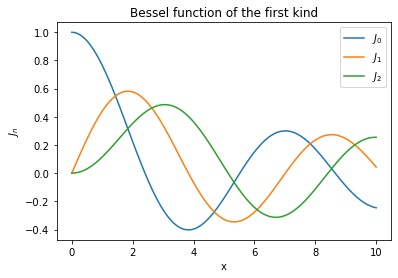

In [3]:
# Test the function
bessel_function(2, 10)    

### Exercise 5.2: Define and test a function that estimates the value of the special constant pi by generating N pairs of random numbers in the interval -1 and 1 and checking how many of the generated number fall into a circumference of radius 1 and centered in the origin. Improve the function showing in a graphical output the square, the circumference and the points inside and outside the circumference with different colors.

In [4]:
def pi_circumferce(N, R = 1):
    '''
    Function that generates x,y data inside a circunference of radius R 
    using acceptance-rejection method to estimate pi and plot the data.
    
    Arguments:
    
    N: size of the data.
    R: radius of the circumference.
    
    Example:
    
    pi_circunference(5000)
    - pi = 3.1184
    
    '''
    # Generate x,y data randomnly
    x = R*(2*np.random.random_sample([N])-1)
    y = R*(2*np.random.random_sample([N])-1)
    d_2 = x*x + y*y
    
    x1, y1 = [] , []
    x2, y2 = [] , []
    
    hits = 0 # counter
    for i in range(N):
        if d_2[i] <= R*R: #acceptance-rejection condition
            x1.append(x[i])
            y1.append(y[i])
            hits += 1
        else:
            x2.append(x[i])
            y2.append(y[i])
    
    pi = 4*(hits/N) # estimation of pi
    plt.scatter(x1, y1, label= '$\pi$='+str(pi))
    plt.scatter(x2, y2)
    plt.legend()
    return print("pi = " +str(pi))

pi = 3.1484


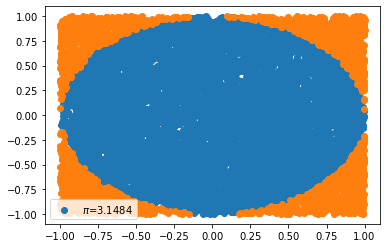

In [5]:
# Test the function
pi_circumferce(10000)

### Exercise 5.3: The aim of this exercise is to generate a set of two-dimensional random walks, plot their trajectories and look and the end point distribution. The random walks considered always begin at the origin and take Nstep random steps of unit or zero size in both directions in the x and y axis. For a total number of Nw walks: 

#### 1. Compute the trajectories and save the final point of all them.

In [6]:
def random_walks(Nw, N):
    '''
    Function that generates a set of two-dimensional random walks,
    plot a trajectory and save  the final point of all the walks.
    
    Arguments:
    Nw :: number of walks.
    R  :: number or random steps.
    '''
    xf, yf = [], []
    for i in range(Nw):
        x = [0] # begin at the x origin
        y = [0] # begin at the y origin
        for j in range(N):
            # random steps of unit one or zero.
            x.append(x[j] + np.random.randint(-1, 2))
            y.append(y[j] + np.random.randint(-1, 2))
            if i == Nw-1 and j == N-1:
                # Plot the last sample of these random walks.
                pylab.plot(x, y) 
                pylab.show()  
        xf.append(x[-1])
        yf.append(y[-1])
    # save the data
    return np.savez("random_walk", a = xf, b = yf)

 #### 2. Plot a sample of these random walks in the plane. 

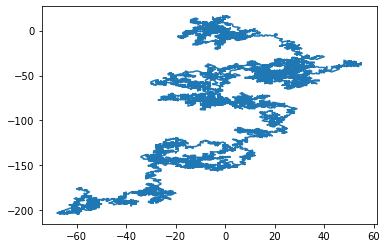

In [7]:
# Test the function and plot a sample of a random walk
random_walks(100, 10000)   

#### 3. Plot all the final points together. 

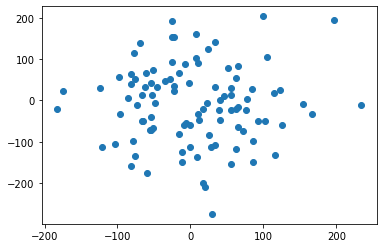

In [8]:
# Load the saved data and plot all the final points
arr_hash = np.load("random_walk.npz")
x1, y1 = arr_hash['a'], arr_hash['b']
plt.scatter(x1, y1)
plt.show()

#### 4. Compute the average final distance from the origin of the system. 

In [9]:
distance = np.sqrt(x1*x1 + y1*y1)
print("The average final distance from the origin of the system is "
      +str(round(distance.mean(),2)))

The average final distance from the origin of the system is 108.4


#### 5. Plot a histogram with the values of the distance to the origin.

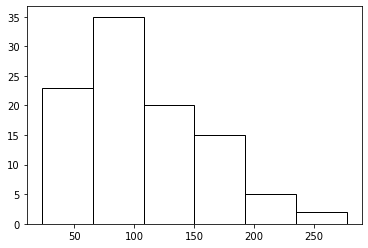

In [10]:
n, bins, patches = plt.hist(distance, bins = 6, 
                            fill=False, range =[min(distance), max(distance)])

### Exercise 5.4: The Julia set is an important concept in fractal theory. Given a complex number a, a point z in the complex plane is said to be in the filled-in Julia set of a function f(z) = z² + a if the iteration of the function over the point does not finish with the point going to infinity. It can be proved that if at some iterate of a point under f(z) the result has a module larger than 2 and larger than the module of a, this point will finish going to infinity. Build and plot the filled-in Julia sets for f(z) with a = (-0.5,0),(0.25,-0.52), (-1,0), (-0.2, 0.66) in the interval of -1 < Re(z), Im(z) < 1 and consider that the point belongs to the set once the previous condition has not been accomplished after Niter = 100. 
Hint: You can make use of the NumPy meshgrid and the PyPlot pplot functions for displaying the filled-in Julia sets.

In [11]:
def julia_set(a_array, N_iter):
    '''
    Function that generates a Julia set plots usign its formula f(z) = z^2 + a
    for different a complex values.
    
    Arguments:
    a_array :: set of a complex values.
    N_iter  :: maximun number of iterations    
    '''
    # Parameters
    x_pixel_size = 300
    y_pixel_size = 300
    xmin, xmax = -1., 1.
    width = xmax - xmin
    ymin, ymax = -1., 1.
    height = ymax - ymin
    z_abs_max = 10
    
    # Initialize an empty plane array 
    julia = np.zeros((x_pixel_size, y_pixel_size))
    
    # Loop over the different a values
    for a in a_array:
        a = complex(a[0],a[1])
        # Loop over the plane
        for ix in range(x_pixel_size):
            for iy in range(y_pixel_size):
                # Map plane array to a point in the complex plane
                z = complex(ix / x_pixel_size * width + xmin,
                            iy / y_pixel_size * height + ymin)
                #  
                iteration = 0
                while abs(z) <= z_abs_max and iteration < N_iter:
                    z = z**2 + a
                    iteration += 1
                iteration_ratio = iteration / N_iter    
                # Set the plane value equal to the iteration_ratio
                julia[ix, iy] = iteration_ratio
        # Plot Julia set using meshgrid
        x = np.linspace(xmin, xmax, x_pixel_size)
        y = np.linspace(ymin, ymax, y_pixel_size)
        np.meshgrid(x, y, sparse=True)
        h = plt.contourf(x,y,julia)
        plt.title("Julia set "+str(a))
        plt.show()

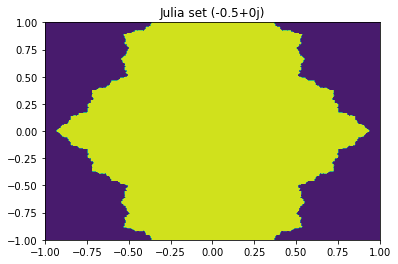

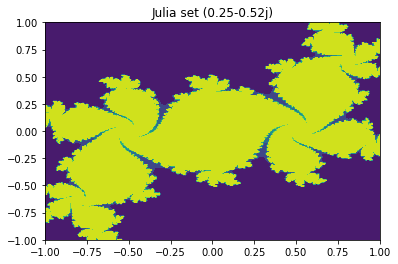

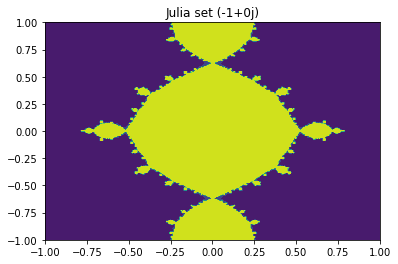

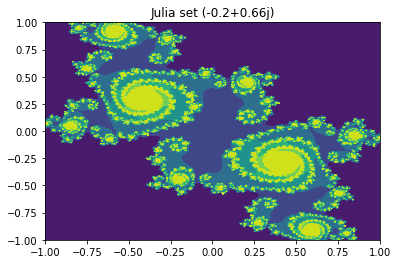

In [12]:
# Test the function for a set of imaginary numbers (a)
a = [(-0.5, 0),(0.25, -0.52), (-1,0), (-0.2, 0.66)]
N_iter = 100
julia_set(a, N_iter)